In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


In [42]:
# Taining and testing data
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

# Size of the images
image_width = 28
image_height = 28

In [43]:
# training images
X = np.array(train.drop('label', axis=1))
# training labels
y = np.array(train['label'])

# number of examples
m = len(y)

# normalize the data
# Pixel values typically range from 0 to 255.
# Dividing by 255.0 scales the data to a [0, 1] range.
# Normalization improves the performance and convergence speed of many machine learning algorithms

pixel_max_value = 255.0

X = np.array(X , dtype='float')/ pixel_max_value

# number of different labels
n_classes = len(np.unique(y))
n_features = X.shape[1]

# we get 24 instead of 26 labels because we do not have "j" and "z" samples (maybe because they are movement signals).
# in order to not get empty labels lets rename the labels
for i in range(len(y)):
    if y[i] > 8:
        y[i] -= 1

print(f'Number of training examples: {m}')
print(f'Number of features: {n_features}')
print(f'Number of classes: {n_classes}')
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')


Number of training examples: 27455
Number of features: 784
Number of classes: 24
X_shape: (27455, 784)
y_shape: (27455,)


In [44]:
X_test = np.array(test.drop('label', axis=1))
y_test = np.array(test['label'])

# number of test examples
m_test = len(y_test)

pixel_max_value = 255.0

X_test = np.array(X_test , dtype='float')/ pixel_max_value

n_test_classes = len(np.unique(y_test))

for i in range(len(y_test)):
    if y_test[i] > 8:
        y_test[i] -= 1


print(f'Number of test examples: {m_test}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_test_shape: {y_test.shape}')

Number of test examples: 7172
X_test_shape: (7172, 784)
y_test_shape: (7172,)


# NEW

In [45]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max to prevent overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [46]:
def cross_entropy_loss(predicted, actual):
    m = actual.shape[0]  # Number of samples
    log_likelihood = -np.log(predicted[range(m), actual])
    loss = np.sum(log_likelihood) / m
    return loss

In [47]:
class SoftmaxClassifier:
    def __init__(self, learning_rate, num_classes, num_features):
        self.learning_rate = learning_rate
        self.weights = np.random.randn(num_features, num_classes)
        self.bias = np.zeros((1, num_classes))
        
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            logits = np.dot(X, self.weights) + self.bias
            probabilities = softmax(logits)
            
            # Compute loss
            loss = cross_entropy_loss(probabilities, y)
            
            # Backward pass (Gradient Descent)
            m = X.shape[0]
            grad_logits = probabilities
            grad_logits[range(m), y] -= 1  # Gradient of loss with respect to logits
            grad_logits /= m
            
            # Update weights and bias
            self.weights -= self.learning_rate * np.dot(X.T, grad_logits)
            self.bias -= self.learning_rate * np.sum(grad_logits, axis=0, keepdims=True)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch} - Loss: {loss}")
    
    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        probabilities = softmax(logits)
        return np.argmax(probabilities, axis=1)

Epoch 0 - Loss: 44.82812941306705
Epoch 100 - Loss: 5.959574338505439
Epoch 200 - Loss: 4.762482187568814
Epoch 300 - Loss: 4.014775738350122
Epoch 400 - Loss: 3.498088178700445
Epoch 500 - Loss: 3.1170351788334076
Epoch 600 - Loss: 2.8252621588526186
Epoch 700 - Loss: 2.5954438189777136
Epoch 800 - Loss: 2.4090354634204845
Epoch 900 - Loss: 2.2537431596791344
Accuracy: 0.35987172336865586

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       331
           1       0.61      0.47      0.53       432
           2       0.80      0.59      0.68       310
           3       0.41      0.39      0.40       245
           4       0.68      0.53      0.59       498
           5       0.47      0.48      0.48       247
           6       0.47      0.25      0.32       348
           7       0.51      0.38      0.44       436
           8       0.28      0.24      0.26       288
           9       0.30      0.23      0.

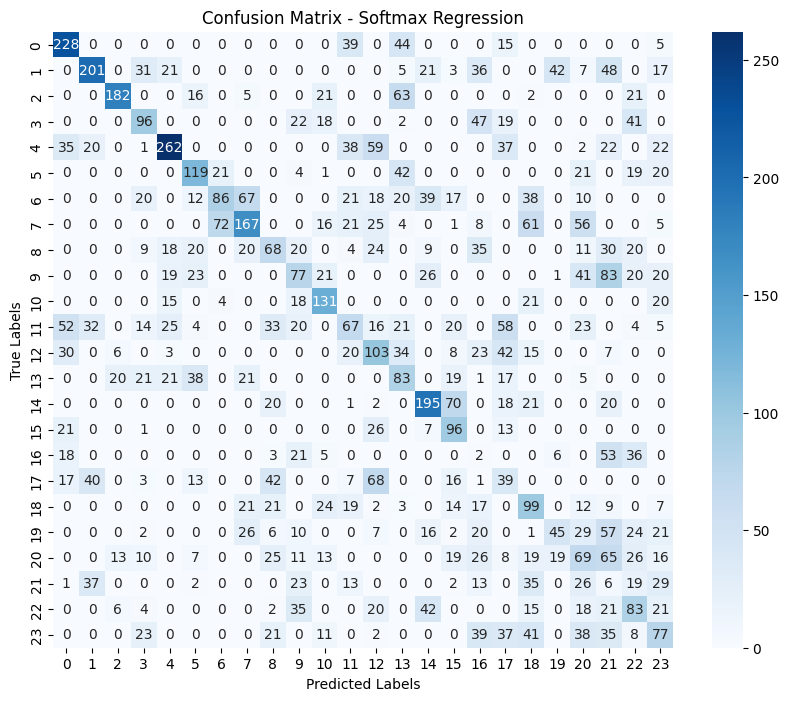

In [48]:
classifier = SoftmaxClassifier(learning_rate=0.1, num_classes=n_classes, num_features=n_features)
classifier.train(X, y, epochs=1000)

y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Softmax Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
